# Fourier Series Approxmation

In [88]:
import math as mt
import numpy as np
import sympy as sp

## General Parameters 

In [89]:
x = sp.symbols('x')
k = sp.var('k', nonzero=True, integer=True)
piecewise = True

a = 0                    # start point in the interval
l = 2                    # period length
b = a+l                  # end point in the interval
modes = 10               # number of terms to consider in the approximation

## Declaring The Function

In [90]:
# function type
if piecewise:
    f = sp.Piecewise((1, (x > 0) & (x < 1)), (-1, (x > 1) &( x < 2)))
else:
    f = x

# display only
f   

Piecewise((1, (x > 0) & (x < 1)), (-1, (x > 1) & (x < 2)))

## Calculation of Fourier Coefficients

\begin{align*}
    a_0 &= \frac{2}{L} \int_L f(x) dx										\\[10pt]
    a_k &= \frac{2}{L} \int_L f(x).\cos\left(\frac{2\pi}{L}xk\right) dx 	\\[10pt]
    b_k &= \frac{2}{L} \int_L f(x).\sin\left(\frac{2\pi}{L}xk\right) dx
\end{align*}


In [91]:
a_0 = sp.integrate((2/l)*f, (x, 0, l))
a_k = sp.integrate((2/l)*f*sp.cos((2*sp.pi/l)*x*k),(x, a,b))
b_k = sp.integrate((2/l)*f*sp.sin((2*sp.pi/l)*x*k),(x, a,b))

a_0 
a_k
b_k

-2.0*(-1)**k/(pi*k) + 2.0/(pi*k)

## Function Approximation

\begin{equation*}
    f(x) = \frac{a_0}{2} + \sum_{k=1}^{\infty}\left(
        a_k \cos\left(\frac{2\pi}{L}xk\right) + b_k\sin\left(\dfrac{2\pi}{L}xk\right)\right)
\end{equation*}

In [92]:
p = a_0/2 
for k_i in range(1,modes):
    p += a_k.subs(k,k_i)*sp.cos((2*sp.pi/l)*x*k_i) + b_k.subs(k,k_i)*sp.sin((2*sp.pi/l)*x*k_i)

p

4.0*sin(pi*x)/pi + 1.33333333333333*sin(3*pi*x)/pi + 0.8*sin(5*pi*x)/pi + 0.571428571428571*sin(7*pi*x)/pi + 0.444444444444444*sin(9*pi*x)/pi

## Ploting The Results

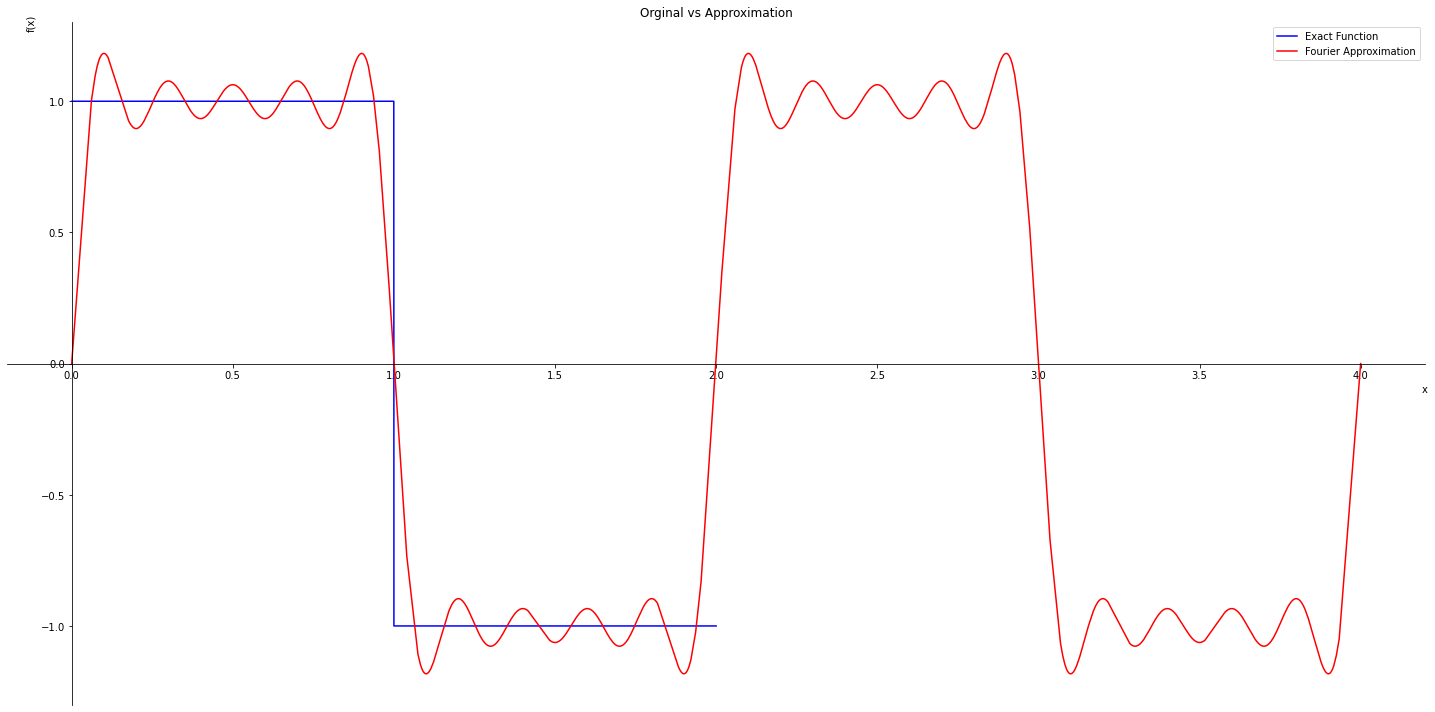

In [93]:
orginal = sp.plot(f, (x, a,2*b), show=False, line_color="blue", label="Exact Function",
                    legend=True, size=(20,10), title="Orginal vs Approximation")
fourier = sp.plot(p, (x, a,2*b), show=False, line_color="red", label="Fourier Approximation")
orginal.append(fourier[0])
orginal.show()